In [38]:
import collections
import copy
import sys
import time
from random import seed

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from torch import optim

import dataset
import evaluation
from GaussianDiffusion import GaussianDiffusionModel, get_beta_schedule
from helpers import *
from UNet import UNetModel, update_ema_params

torch.cuda.empty_cache()

ROOT_DIR = "./"

In [39]:
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms

In [47]:
import json
import os
from collections import defaultdict

import torch
import torchvision.utils


def gridify_output(img, row_size=-1):
    scale_img = lambda img: ((img + 1) * 127.5).clamp(0, 255).to(torch.uint8)
    return torchvision.utils.make_grid(scale_img(img), nrow=row_size, pad_value=-1).cpu().data.permute(
            0, 2,
            1
            ).contiguous().permute(
            2, 1, 0
            )


def defaultdict_from_json(jsonDict):
    func = lambda: defaultdict(str)
    dd = func()
    dd.update(jsonDict)
    return dd


def load_checkpoint(param, use_checkpoint, device):
    """
    loads the most recent (non-corrupted) checkpoint or the final model
    :param param: args number
    :param use_checkpoint: checkpointed or final model
    :return:
    """
    if not use_checkpoint:
        return torch.load(f'./model/diff-params-ARGS={param}/params-final.pt', map_location=device)
    else:
        checkpoints = os.listdir(f'./model/diff-params-ARGS={param}/checkpoint')
        checkpoints.sort(reverse=True)
        for i in checkpoints:
            try:
                file_dir = f"./model/diff-params-ARGS={param}/checkpoint/{i}"
                loaded_model = torch.load(file_dir, map_location=device)
                break
            except RuntimeError:
                continue
        return loaded_model


def load_parameters(device, argN, use_checkpoint):
    """
    Loads the trained parameters for the detection model
    :return:
    """
    import sys
    params = os.listdir("./model")
    if ".DS_Store" in params:
        params.remove(".DS_Store")
    output = load_checkpoint(argN, use_checkpoint, device)
        
    if "args" in output:
        args = output["args"]
    else:
        try:
            with open(f'./test_args/args{argN}.json', 'r') as f:
                args = json.load(f)
            args['arg_num'] = argN
            args = defaultdict_from_json(args)
        except FileNotFoundError:
            raise ValueError(f"args{argN} doesn't exist")

    if "noise_fn" not in args:
        args["noise_fn"] = "gauss"

    return args, output


def main():
    pass


if __name__ == '__main__':
    main()


In [53]:
file_dir = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\model\diff-params-ARGS=35\checkpoint\diff_epoch=1000.pt"
loaded_model = torch.load(file_dir, map_location=device)

In [48]:
params = os.listdir("./model")

In [49]:
param = params[-1]

In [54]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# args, output = load_parameters(device, 35, True)

In [5]:
# import UNet

In [6]:
# if __name__ == "__main__":
#     args = {
#         'img_size':          256,
#         'base_channels':     64,
#         'dropout':           0.3,
#         'num_heads':         4,
#         'num_head_channels': '32,16,8',
#         'lr':                1e-4,
#         'Batch_Size':        64
#         }
#     model = UNetModel(
#             args['img_size'], args['base_channels'], dropout=args[
#                 "dropout"], n_heads=args["num_heads"], attention_resolutions=args["num_head_channels"],
#             in_channels=4
#             )

#     x = torch.randn(1, 4, 512, 512)
#     t_batch = torch.tensor([1], device=x.device).repeat(x.shape[0])
#     print(model(x, t_batch))

In [7]:
# t_batch

In [8]:
from torchviz import make_dot

In [9]:
# model = UNetModel(
#         args['img_size'], args['base_channels'], dropout=args[
#             "dropout"], n_heads=args["num_heads"], attention_resolutions=args["num_head_channels"],
#         in_channels=3
#         )

# x = torch.randn(10, 3, 512, 512)
# t_batch = torch.tensor([1], device=x.device).repeat(x.shape[0])
# y_hat = model(x, t_batch)

In [10]:
# model

In [11]:
import os
from random import randint

import cv2
import nibabel
import numpy as np
import torch
from matplotlib import animation
from torch.utils.data import Dataset
from torchvision import datasets, transforms
import imageio.v2 as imageio
import os
from PIL import Image
from torchvision import transforms
import pandas as pd
import random
from scipy import ndimage
import matplotlib.pyplot as plt

In [12]:
# import mat73
# # data_dict = mat73.loadmat('data.mat')

# file_path = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainTumorDataPublic_1-766\2.mat"
# mat = mat73.loadmat(file_path)
# # data = mat['data']
# # print(type(data))
# # print(data)

In [13]:
# directory = os.path.expanduser(r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainTumorDataPublic_1-766")

In [14]:
# database = os.listdir(directory)

In [15]:
# di_r = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainTumorDataPublic_1-766"
# ano_dataset = dataset.MatTDataset(di_r)

In [16]:
# for i in  ano_dataset:
#     print(i["image"].shape)

In [21]:
device

device(type='cuda')

['.ipynb_checkpoints', 'diff-params-ARGS=', 'diff-params-ARGS=10', 'diff-params-ARGS=12', 'diff-params-ARGS=14', 'diff-params-ARGS=26', 'diff-params-ARGS=27', 'diff-params-ARGS=28', 'diff-params-ARGS=30', 'diff-params-ARGS=31', 'diff-params-ARGS=32', 'diff-params-ARGS=33', 'diff-params-ARGS=34', 'diff-params-ARGS=35']


KeyError: "filename 'storages' not found"

In [22]:
args

defaultdict(str,
            {'img_size': [256, 256],
             'Batch_Size': 1,
             'EPOCHS': 4000,
             'T': 1000,
             'base_channels': 128,
             'channels': 1,
             'beta_schedule': 'cosine',
             'channel_mults': '',
             'loss-type': 'l2',
             'loss_weight': 'none',
             'train_start': True,
             'lr': 0.0001,
             'random_slice': False,
             'sample_distance': 800,
             'weight_decay': 0.0,
             'save_imgs': True,
             'save_vids': True,
             'dropout': 0,
             'attention_resolutions': '16,8',
             'num_heads': 2,
             'num_head_channels': -1,
             'noise_fn': 'simplex',
             'dataset': 'mri',
             'arg_num': '34'})

In [15]:
database = []
for root, dirs, files in os.walk(directory):
    # if there are no subdirs, we have data
    if not dirs:
        files.sort()
        datapoint = dict()
        # extract all files as channels
        for f in files:
            seqtype = f.split('_')[3]
            datapoint[seqtype] = os.path.join(root, f)
        database.append(datapoint)

IndexError: list index out of range

In [16]:
mat

{'cjdata': {'PID': '100360',
  'image': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int16),
  'label': array(1.),
  'tumorBorder': array([319.33101045, 153.42160279, 302.38327526, 161.44947735,
         292.57142857, 160.55749129, 283.65156794, 165.90940767,
         272.94773519, 176.61324042, 268.48780488, 184.64111498,
         269.37979094, 195.34494774, 270.271777  , 200.69686411,
         264.02787456, 209.61672474, 264.91986063, 215.86062718,
         272.94773519, 222.99651568, 267.59581882, 231.91637631,
         272.05574913, 242.62020906, 279.19163763, 244.40418118,
         288.11149826, 255.10801394, 296.13937282, 256.89198606,
         304.16724739, 256.89198606, 312.19512195, 253.32404181,
         321.11498258, 248.8641115 , 325.57491289, 248.8641115 ,
         334.49477352, 248.8641115 , 340.7

In [17]:
image = mat["cjdata"]["image"]

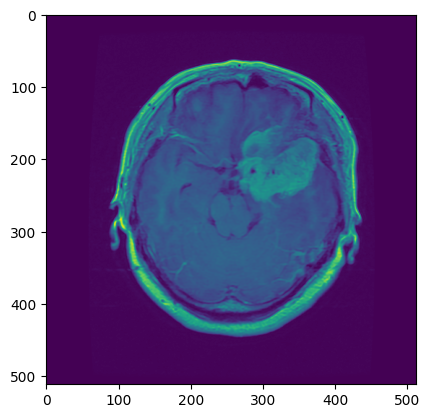

In [18]:
plt.imshow(mat["cjdata"]["image"])

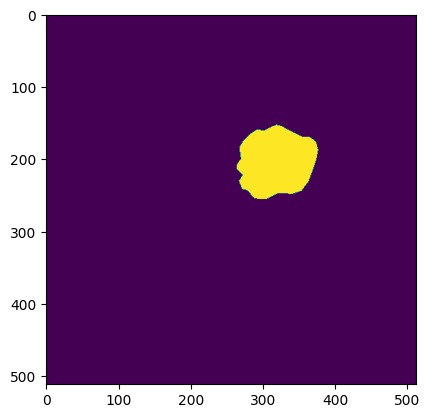

In [19]:
plt.imshow(mat["cjdata"]["tumorMask"])

In [ ]:
args = {
  "img_size": [
    256,
    256
  ],
  "Batch_Size": 1,
  "train_dir": r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\data\brats\training",
  "test_dir": r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\data\brats\testing",
  "EPOCHS": 3000,
  "T": 1000,
  "base_channels": 128,
  "beta_schedule": "linear",
  "channel_mults": "",
  "loss-type": "l2",
  "loss_weight": "none",
  "train_start": True,
  "lr": 1e-4,
  "random_slice": False,
  "sample_distance": 800,
  "weight_decay": 0.0,
  "save_imgs": False,
  "save_vids": True,
  "dropout": 0,
  "attention_resolutions": "16,8",
  "num_heads": 2,
  "num_head_channels": -1,
  "noise_fn": "simplex",
  "dataset": "brats"
}

In [ ]:
import os
directory = os.path.expanduser(args["train_dir"])

In [ ]:
import torch
import dataset

In [ ]:
train , test= dataset.init_datasets("./", args)

In [ ]:
train_data = dataset.init_dataset_loader(train, args)

In [ ]:
train

In [ ]:
fp = test.database[0]

In [ ]:
fp['t1'].split('\\')

In [ ]:
datal = torch.utils.data.DataLoader(
    train,
    batch_size=2,
    shuffle=True)

In [ ]:
# len(train_data)

In [ ]:
for i in datal:
    print(i['image'].shape)

In [ ]:
import torch
import torchvision.transforms as transforms

# # Load your image as a tensor
# img = ...

# Define the resize transformation
resize = transforms.Resize((256, 256))

# Apply the transformation to the image
img_resized = resize(i['mask'])

In [ ]:
torch.Tensor

In [ ]:
plt.imshow(img_resized[0])

In [ ]:
def train(training_dataset_loader, testing_dataset_loader, args, resume):
    """
    :param training_dataset_loader: cycle(dataloader) instance for training
    :param testing_dataset_loader:  cycle(dataloader) instance for testing
    :param args: dictionary of parameters
    :param resume: dictionary of parameters if continuing training from checkpoint
    :return: Trained model and tested
    """

    in_channels = 1
    if args["dataset"].lower() == "cifar" or args["dataset"].lower() == "leather":
        in_channels = 3

    if args["channels"] != "":
        in_channels = args["channels"]

    model = UNetModel(
            args['img_size'][0], args['base_channels'], channel_mults=args['channel_mults'], dropout=args[
                "dropout"], n_heads=args["num_heads"], n_head_channels=args["num_head_channels"],
            in_channels=in_channels
            )

    betas = get_beta_schedule(args['T'], args['beta_schedule'])

    diffusion = GaussianDiffusionModel(
            args['img_size'], betas, loss_weight=args['loss_weight'],
            loss_type=args['loss-type'], noise=args["noise_fn"], img_channels=in_channels
            )

    if resume:

        if "unet" in resume:
            model.load_state_dict(resume["unet"])
        else:
            model.load_state_dict(resume["ema"])

        ema = UNetModel(
                args['img_size'][0], args['base_channels'], channel_mults=args['channel_mults'],
                dropout=args["dropout"], n_heads=args["num_heads"], n_head_channels=args["num_head_channels"],
                in_channels=in_channels
                )
        ema.load_state_dict(resume["ema"])
        start_epoch = resume['n_epoch']

    else:
        start_epoch = 0
        ema = copy.deepcopy(model)

    tqdm_epoch = range(start_epoch, args['EPOCHS'] + 1)
    model.to(device)
    ema.to(device)
    optimiser = optim.AdamW(model.parameters(), lr=args['lr'], weight_decay=args['weight_decay'], betas=(0.9, 0.999))
    if resume:
        optimiser.load_state_dict(resume["optimizer_state_dict"])

    del resume
    start_time = time.time()
    losses = []
    vlb = collections.deque([], maxlen=10)
    iters = range(100 // args['Batch_Size']) if args["dataset"].lower() != "cifar" else range(200)
    # iters = range(100 // args['Batch_Size']) if args["dataset"].lower() != "cifar" else range(150)

    # dataset loop
    for epoch in tqdm_epoch:
        mean_loss = []

        for i in iters:
            data = next(training_dataset_loader)
            if args["dataset"] == "cifar":
                # cifar outputs [data,class]
                x = data[0].to(device)
            else:
                x = data["image"]
                x = x.to(device)

            loss, estimates = diffusion.p_loss(model, x, args)

            noisy, est = estimates[1], estimates[2]
            optimiser.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
            optimiser.step()

            update_ema_params(ema, model)
            mean_loss.append(loss.data.cpu())

            if epoch % 50 == 0 and i == 0:
                row_size = min(8, args['Batch_Size'])
                training_outputs(
                        diffusion, x, est, noisy, epoch, row_size, save_imgs=args['save_imgs'],
                        save_vids=args['save_vids'], ema=ema, args=args
                        )

        losses.append(np.mean(mean_loss))
        if epoch % 200 == 0:
            time_taken = time.time() - start_time
            remaining_epochs = args['EPOCHS'] - epoch
            time_per_epoch = time_taken / (epoch + 1 - start_epoch)
            hours = remaining_epochs * time_per_epoch / 3600
            mins = (hours % 1) * 60
            hours = int(hours)

            vlb_terms = diffusion.calc_total_vlb(x, model, args)
            vlb.append(vlb_terms["total_vlb"].mean(dim=-1).cpu().item())
            print(
                    f"epoch: {epoch}, most recent total VLB: {vlb[-1]} mean total VLB:"
                    f" {np.mean(vlb):.4f}, "
                    f"prior vlb: {vlb_terms['prior_vlb'].mean(dim=-1).cpu().item():.2f}, vb: "
                    f"{torch.mean(vlb_terms['vb'], dim=list(range(2))).cpu().item():.2f}, x_0_mse: "
                    f"{torch.mean(vlb_terms['x_0_mse'], dim=list(range(2))).cpu().item():.2f}, mse: "
                    f"{torch.mean(vlb_terms['mse'], dim=list(range(2))).cpu().item():.2f}"
                    f" time elapsed {int(time_taken / 3600)}:{((time_taken / 3600) % 1) * 60:02.0f}, "
                    f"est time remaining: {hours}:{mins:02.0f}\r"
                    )
            # else:
            #
            #     print(
            #             f"epoch: {epoch}, imgs trained: {(i + 1) * args['Batch_Size'] + epoch * 100}, last 20 epoch mean loss:"
            #             f" {np.mean(losses[-20:]):.4f} , last 100 epoch mean loss:"
            #             f" {np.mean(losses[-100:]) if len(losses) > 0 else 0:.4f}, "
            #             f"time per epoch {time_per_epoch:.2f}s, time elapsed {int(time_taken / 3600)}:"
            #             f"{((time_taken / 3600) % 1) * 60:02.0f}, est time remaining: {hours}:{mins:02.0f}\r"
            #             )

        if epoch % 1000 == 0 and epoch >= 0:
            save(unet=model, args=args, optimiser=optimiser, final=False, ema=ema, epoch=epoch)

    save(unet=model, args=args, optimiser=optimiser, final=True, ema=ema)

    evaluation.testing(testing_dataset_loader, diffusion, ema=ema, args=args, model=model)


def save(final, unet, optimiser, args, ema, loss=0, epoch=0):
    """
    Save model final or checkpoint
    :param final: bool for final vs checkpoint
    :param unet: unet instance
    :param optimiser: ADAM optim
    :param args: model parameters
    :param ema: ema instance
    :param loss: loss for checkpoint
    :param epoch: epoch for checkpoint
    :return: saved model
    """
    if final:
        torch.save(
                {
                    'n_epoch':              args["EPOCHS"],
                    'model_state_dict':     unet.state_dict(),
                    'optimizer_state_dict': optimiser.state_dict(),
                    "ema":                  ema.state_dict(),
                    "args":                 args
                    # 'loss': LOSS,
                    }, f'{ROOT_DIR}model/diff-params-ARGS={args["arg_num"]}/params-final.pt'
                )
    else:
        torch.save(
                {
                    'n_epoch':              epoch,
                    'model_state_dict':     unet.state_dict(),
                    'optimizer_state_dict': optimiser.state_dict(),
                    "args":                 args,
                    "ema":                  ema.state_dict(),
                    'loss':                 loss,
                    }, f'{ROOT_DIR}model/diff-params-ARGS={args["arg_num"]}/checkpoint/diff_epoch={epoch}.pt'
                )


def training_outputs(diffusion, x, est, noisy, epoch, row_size, ema, args, save_imgs=False, save_vids=False):
    """
    Saves video & images based on args info
    :param diffusion: diffusion model instance
    :param x: x_0 real data value
    :param est: estimate of the noise at x_t (output of the model)
    :param noisy: x_t
    :param epoch:
    :param row_size: rows for outputs into torchvision.utils.make_grid
    :param ema: exponential moving average unet for sampling
    :param save_imgs: bool for saving imgs
    :param save_vids: bool for saving diffusion videos
    :return:
    """
    try:
        os.makedirs(f'./diffusion-videos/ARGS={args["arg_num"]}')
        os.makedirs(f'./diffusion-training-images/ARGS={args["arg_num"]}')
    except OSError:
        pass
    if save_imgs:
        if epoch % 100 == 0:
            # for a given t, output x_0, & prediction of x_(t-1), and x_0
            noise = torch.rand_like(x)
            t = torch.randint(0, diffusion.num_timesteps, (x.shape[0],), device=x.device)
            x_t = diffusion.sample_q(x, t, noise)
            temp = diffusion.sample_p(ema, x_t, t)
            out = torch.cat(
                    (x[:row_size, ...].cpu(), temp["sample"][:row_size, ...].cpu(),
                     temp["pred_x_0"][:row_size, ...].cpu())
                    )
            plt.title(f'real,sample,prediction x_0-{epoch}epoch')
        else:
            # for a given t, output x_0, x_t, & prediction of noise in x_t & MSE
            out = torch.cat(
                    (x[:row_size, ...].cpu(), noisy[:row_size, ...].cpu(), est[:row_size, ...].cpu(),
                     (est - noisy).square().cpu()[:row_size, ...])
                    )
            plt.title(f'real,noisy,noise prediction,mse-{epoch}epoch')
        plt.rcParams['figure.dpi'] = 150
        plt.grid(False)
        plt.imshow(gridify_output(out, row_size), cmap='gray')

        plt.savefig(f'./diffusion-training-images/ARGS={args["arg_num"]}/EPOCH={epoch}.png')
        plt.clf()
    if save_vids:
        fig, ax = plt.subplots()
        if epoch % 500 == 0:
            plt.rcParams['figure.dpi'] = 200
            if epoch % 1000 == 0:
                out = diffusion.forward_backward(ema, x, "half", args['sample_distance'] // 2, denoise_fn="noise_fn")
            else:
                out = diffusion.forward_backward(ema, x, "half", args['sample_distance'] // 4, denoise_fn="noise_fn")
            imgs = [[ax.imshow(gridify_output(x, row_size), animated=True)] for x in out]
#             ani = animation.FuncAnimation(
#                     fig, imgs, frames=np.arange(0, 3)
#                     )
#             fig.savefig(f"{ROOT_DIR}diffusion-videos/ARGS28_sample-EPOCH={epoch}_figure.png")
#             my_writer=animation.PillowWriter(fps=20, codec='libx264', bitrate=2)
            
# #             ani = animation.ArtistAnimation(
# #                     fig, imgs, interval=50, blit=True,
# #                     repeat_delay=1000
# #                     )
#             ani.save(f'{ROOT_DIR}diffusion-videos/ARGS/sample-EPOCH={epoch}.gif', writer = my_writer)

    plt.close('all')




In [ ]:
import os
from random import randint

import cv2
import nibabel as nib
import numpy as np
import torch
from matplotlib import animation
from torch.utils.data import Dataset
from torchvision import datasets, transforms

class MRIDataset(Dataset):
    """Healthy MRI dataset."""

    def __init__(self, ROOT_DIR, transform=None, img_size=(32, 32), random_slice=False):
        """
        Args:
            ROOT_DIR (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.transform = transforms.Compose(
                [transforms.ToPILImage(),
                 transforms.RandomAffine(3, translate=(0.02, 0.09)),
                 transforms.CenterCrop(235),
                 transforms.Resize(img_size, transforms.InterpolationMode.BILINEAR),
                 # transforms.CenterCrop(256),
                 transforms.ToTensor(),
                 transforms.Normalize((0.5), (0.5))
                 ]
                ) if not transform else transform

        self.filenames = os.listdir(ROOT_DIR)
        if ".DS_Store" in self.filenames:
            self.filenames.remove(".DS_Store")
        self.ROOT_DIR = ROOT_DIR
        self.random_slice = random_slice

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        # print(repr(idx))
        if torch.is_tensor(idx):
            idx = idx.tolist()
        if os.path.exists(os.path.join(self.ROOT_DIR, self.filenames[idx], f"{self.filenames[idx]}.npy")):
            image = np.load(os.path.join(self.ROOT_DIR, self.filenames[idx], f"{self.filenames[idx]}.npy"))
            pass
        else:
            print("NBF3")
            img_name = os.path.join(
                    self.ROOT_DIR, self.filenames[idx], f"sub-{self.filenames[idx]}_ses-NFB3_T1w_brain.nii.gz"
                    )
            # random between 40 and 130
            print(nib.load(img_name).slicer[:,90:91,:].dataobj.shape)
            img = nib.load(img_name)
            image = img.get_fdata()

            image_mean = np.mean(image)
            image_std = np.std(image)
            img_range = (image_mean - 1 * image_std, image_mean + 2 * image_std)
            image = np.clip(image, img_range[0], img_range[1])
            image = image / (img_range[1] - img_range[0])
            np.save(
                    os.path.join(self.ROOT_DIR, self.filenames[idx], f"{self.filenames[idx]}.npy"), image.astype(
                            np.float32
                            )
                    )
        if self.random_slice:
            # slice_idx = randint(32, 122)
            slice_idx = randint(40, 100)
        else:
            slice_idx = 80

        image = image[:, slice_idx:slice_idx + 1, :].reshape(256, 192).astype(np.float32)

        if self.transform:
            image = self.transform(image)

        sample = {'image': image, "filenames": self.filenames[idx]}
        return sample


In [ ]:
import numpy as np
import imageio.v2 as imageio
import os
from PIL import Image
from torchvision import transforms
# from torchvision import functional
import torch
import pandas as pd
import random
class TUMOR():
    def __init__(self, input_size, root, is_train=True, data_len=None):
        self.input_size = input_size
        self.root = root
#         self.transform = transform
#         self.to_pil = transforms.ToPILImage()
        self.is_train = is_train
        train_img_path = os.path.join(self.root)
        test_img_path = os.path.join(self.root)
        train_label_file = open(os.path.join(self.root, 'train.txt'))
        test_label_file = open(os.path.join(self.root, 'test.txt'))
        train_img_label = []
        test_img_label = []
        for line in train_label_file:
            train_img_label.append([os.path.join(train_img_path, line[:-2]), int(line[-2])])
        for line in test_label_file:
            test_img_label.append([os.path.join(test_img_path, line[:-2]), int(line[-2])])
        self.train_img_label = train_img_label[:data_len]
        self.test_img_label = test_img_label[:data_len]


    def __getitem__(self, index):
        if self.is_train:
            img, target = imageio.imread(self.train_img_label[index][0]), self.train_img_label[index][1]
            if len(img.shape) == 2:
                img = np.stack([img] * 3, 2)
            img = Image.fromarray(img, mode='RGB')

            img = transforms.Resize(self.input_size, Image.Resampling.BILINEAR)(img)
            # img = transforms.RandomResizedCrop(size=self.input_size,scale=(0.4, 0.75),ratio=(0.5,1.5))(img)
            # img = transforms.RandomCrop(self.input_size)(img)
            img = transforms.RandomHorizontalFlip()(img)
            img = transforms.ColorJitter(brightness=0.2, contrast=0.2)(img)

            img = transforms.ToTensor()(img)
            img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(img)

        else:
            img, target = imageio.imread(self.test_img_label[index][0]), self.test_img_label[index][1]
            if len(img.shape) == 2:
                img = np.stack([img] * 3, 2)
            img = Image.fromarray(img, mode='RGB')
            img = transforms.Resize(self.input_size, Image.BILINEAR)(img)
            # img = transforms.CenterCrop(self.input_size)(img)
            img = transforms.ToTensor()(img)
            img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(img)
        sample = {'image': img, "filenames": target}
        return sample

    def __len__(self):
        if self.is_train:
            return len(self.train_img_label)
        else:
            return len(self.test_img_label)

In [ ]:
unet = UNetModel(args['img_size'][0], args['base_channels'], channel_mults=args['channel_mults'])


In [ ]:
betas = get_beta_schedule(args['T'], args['beta_schedule'])

diff = GaussianDiffusionModel(
        args['img_size'], betas, loss_weight=args['loss_weight'],
        loss_type=args['loss-type'], noise=args["noise_fn"]
        )

In [ ]:
img = torch.rand(10, 1, 256, 256)

In [ ]:
# im

In [ ]:
timestep = random.randint(int(args["sample_distance"] * 0.2), int(args["sample_distance"] * 0.6))

In [ ]:
timestep

In [ ]:
unet = unet.cuda()
image = image.cuda()

In [ ]:
device

In [ ]:
use_checkpoint

In [19]:
output = load_checkpoint(params[-1][-2:], use_checkpoint, device)

NameError: name 'params' is not defined

In [ ]:
output["args"]

In [ ]:
params = os.listdir("./model")
params

In [ ]:
params[-1][-2:]

In [ ]:
if len(sys.argv[1:]) > 0:
    params = sys.argv[1:]
else:
    params = os.listdir("./model")
if ".DS_Store" in params:
    params.remove(".DS_Store")

if params[0] == "CHECKPOINT":
    use_checkpoint = True
    params = params[1:]
else:
    use_checkpoint = False

params = 28
for param in params:
    if param.isnumeric():
        output = load_checkpoint(param, use_checkpoint, device)
    elif param[:4] == "args" and param[-5:] == ".json":
        output = load_checkpoint(param[4:-5], use_checkpoint, device)
    elif param[:4] == "args":
        output = load_checkpoint(param[4:], use_checkpoint, device)
    else:
        raise ValueError(f"Unsupported input {param}")

    if "args" in output:
        args = output["args"]
    else:
        try:
            with open(f'./test_args/args{param[17:]}.json', 'r') as f:
                args = json.load(f)
            args['arg_num'] = param[17:]
            args = defaultdict_from_json(args)
        except FileNotFoundError:
            raise ValueError(f"args{param[17:]} doesn't exist for {param}")

    if "noise_fn" not in args:
        args["noise_fn"] = "gauss"

In [ ]:
from helpers import load_parameters

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
args, output = load_parameters(device)

In [ ]:
args

In [ ]:

in_channels = 1
unet = UNetModel(
        args['img_size'][0], args['base_channels'], channel_mults=args['channel_mults'], in_channels=in_channels
        )

betas = get_beta_schedule(args['T'], args['beta_schedule'])

diff = GaussianDiffusionModel(
        args['img_size'], betas, loss_weight=args['loss_weight'],
        loss_type=args['loss-type'], noise=args["noise_fn"], img_channels=in_channels
        )
unet.load_state_dict(output["ema"])
unet.to(device)

In [ ]:
output = diff.forward_backward(
                unet, image,
                see_whole_sequence=None,
                t_distance=200, denoise_fn=args["noise_fn"]
                )

In [ ]:
output.shape

In [ ]:
imm = transform(output[0])
imm

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
out = output[0].cuda()

In [ ]:
mse = (image - output).square()

In [ ]:
imm = transform(mse[0])
imm

In [ ]:
len(output)

In [ ]:
output[0].shape

In [ ]:
import matplotlib
# matplotlib.matplotlib_fname()

In [ ]:
# !pip install matplotlib

In [ ]:
# import matplotlib
# matplotlib.use('qtagg')

In [ ]:
transform = transforms .ToPILImage()

In [ ]:
imm = transform(mse[0])
imm

In [ ]:
imm = transform(output[0][0])
imm.show()

In [ ]:
imm = transform(output[1][0])
imm

In [ ]:
imm = transform(output[2][0])
imm

In [ ]:
imm = transform(output[3][0])
imm

In [ ]:
imm = transform(output[4][0])
imm

In [ ]:
imm = transform(output[5][0])
imm

In [ ]:
imm = transform(output[6][0])
imm

In [ ]:
imm = transform(output[7][0])
imm

In [ ]:
imm = transform(output[8][0])
imm

In [ ]:
imm = transform(output[9][0])
imm

In [ ]:
imm = transform(output[-1][0])
imm.show()

In [ ]:
# for i in range(7, 50):
#     imm = transform(output[i][0])
#     imm.show()

In [ ]:
# plt.imshow(output[0])

In [ ]:
# fl = os.listdir(ROOT_DIR)

In [ ]:
# fl

In [ ]:
p = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\Train\A00056627\sub-A00056627_ses-NFB3_T1w_brain.nii.gz"

In [ ]:
# img = nib.load(p)
# image = img.get_fdata()

# image_mean = np.mean(image)
# image_std = np.std(image)
# img_range = (image_mean - 1 * image_std, image_mean + 2 * image_std)
# image = np.clip(image, img_range[0], img_range[1])
# image = image / (img_range[1] - img_range[0])

In [ ]:
# img

In [ ]:
def cycle(iterable):
    while True:
        for x in iterable:
            yield x

In [ ]:
def init_datasets(ROOT_DIR, args):
    training_dataset = MRIDataset(
            ROOT_DIR=f'{ROOT_DIR}DATASETS/Train/', img_size=args['img_size'], random_slice=args['random_slice']
            )
    testing_dataset = MRIDataset(
            ROOT_DIR=f'{ROOT_DIR}DATASETS/Test/', img_size=args['img_size'], random_slice=args['random_slice']
            )
    return training_dataset, testing_dataset


def init_dataset_loader(dataset, args, shuffle=True):
    dataset_loader = cycle(
            torch.utils.data.DataLoader(
                    dataset,
                    batch_size=args['Batch_Size'], shuffle=shuffle,
                    num_workers=0, drop_last=True
                    )
            )

    return dataset_loader

In [ ]:
class AnoClsDataset(Dataset):
    def __init__(self, input_size, root, data_len=None):
        self.input_size = input_size
        self.root = root
        l1  = [[os.path.join(root, 'no', x), 0, x] for x in os.listdir(os.path.join(root, "no"))]
        l2  = [[os.path.join(root, 'yes', x), 1, x] for x in os.listdir(os.path.join(root, "yes"))]
        self.img_label = l1+l2

    def __getitem__(self, index):
            img, target, filename = imageio.imread(self.img_label[index][0]), self.img_label[index][1], self.img_label[index][2]
            if len(img.shape) == 2:
                img = np.stack([img] * 3, 2)
            img = Image.fromarray(img, mode='RGB')
            img = transforms.Resize(self.input_size, Image.BILINEAR)(img)
            # img = transforms.CenterCrop(self.input_size)(img)
            img = transforms.ToTensor()(img)
            img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(img)
            sample = {'image': img, "label": target, "filenames": filename}
            return sample

    def __len__(self):
        return len(self.test_img_label)

In [ ]:
path = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\Brain_Tumor\brain_tumor_dataset"

In [ ]:
os.listdir(path)

In [ ]:
AnoData = AnoClsDataset((256, 256), path)

In [ ]:
# for i in AnoData:
#     print(i["filenames"])

In [ ]:
ff = []
# for y in os.listdir(path):
#     print(y)
#     ff.append([os.path.join(path, y , x), y] for x in [os.listdir(os.path.join(path, y))])
#     ff

In [ ]:
l1 = [[os.path.join(path, 'no' , x), 0] for x in os.listdir(os.path.join(path, 'no'))]
l2= [[os.path.join(path, 'no' , x), 'no'] for x in os.listdir(os.path.join(path, 'no'))]

In [ ]:
l1  = [[os.path.join(path, 'no', x), 0] for x in os.listdir(os.path.join(path, "no"))]
l2  = [[os.path.join(path, 'yes', x), 1] for x in os.listdir(os.path.join(path, "yes"))]

In [ ]:
l = l1+l2

In [ ]:
l

In [ ]:
filenames = list(map(lambda name: f"{path}/{name}", f))

In [ ]:
ff

In [ ]:
image = imageio.imread(l[0][0])

In [ ]:
# importing Image class from PIL package
from PIL import Image

# creating a object
im = Image.open(l[0][0])

im.show()


In [ ]:
img = torchvision.transforms.functional.pil_to_tensor(im)

In [ ]:
img = torchvision.transforms.Resize([256, 256])(img)

In [ ]:
image = img.reshape(1, 1, 256, 256)

In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
# plt.imshow(image)

In [ ]:
image.shape

In [ ]:
# filenames

In [ ]:
class AnomalousClsDataset(Dataset):
    """Anomalous MRI dataset."""

    def __init__(
            self, ROOT_DIR, transform=None, img_size=(32, 32), slice_selection="random", resized=False,
            cleaned=True
            ):
        """
        Args:
            ROOT_DIR (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
            img_size: size of each 2D dataset image
            slice_selection: "random" = randomly selects a slice from the image
                             "iterateKnown" = iterates between ranges of tumour using slice data
                             "iterateUnKnown" = iterates through whole MRI volume
        """
        self.transform = transforms.Compose(
                [transforms.ToPILImage(),
                 transforms.CenterCrop((175, 240)),
                 # transforms.RandomAffine(0, translate=(0.02, 0.1)),
                 transforms.Resize(img_size, transforms.InterpolationMode.BILINEAR),
                 # transforms.CenterCrop(256),
                 transforms.ToTensor(),
                 transforms.Normalize((0.5), (0.5))
                 ]
                ) if not transform else transform
        self.img_size = img_size
        self.resized = resized
        self.slices = {
            "17904": range(165, 205), "18428": range(177, 213), "18582": range(160, 190), "18638": range(160, 212),
            "18675": range(140, 200), "18716": range(135, 190), "18756": range(150, 205), "18863": range(130, 190),
            "18886": range(120, 180), "18975": range(170, 194), "19015": range(158, 195), "19085": range(155, 195),
            "19275": range(184, 213), "19277": range(158, 209), "19357": range(158, 210), "19398": range(164, 200),
            "19423": range(142, 200), "19567": range(160, 200), "19628": range(147, 210), "19691": range(155, 200),
            "19723": range(140, 170), "19849": range(150, 180)
            }

        self.filenames = self.slices.keys()
        if cleaned:
            self.filenames = list(map(lambda name: f"{ROOT_DIR}/raw_cleaned/{name}.npy", self.filenames))
        else:
            self.filenames = list(map(lambda name: f"{ROOT_DIR}/raw/{name}.npy", self.filenames))
        # self.filenames = os.listdir(ROOT_DIR)
        if ".DS_Store" in self.filenames:
            self.filenames.remove(".DS_Store")
        self.ROOT_DIR = ROOT_DIR
        self.slice_selection = slice_selection

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        if os.path.exists(os.path.join(f"{self.filenames[idx]}")):
            if self.resized and os.path.exists(os.path.join(f"{self.filenames[idx][:-4]}-resized.npy")):
                image = np.load(os.path.join(f"{self.filenames[idx][:-4]}-resized.npy"))
            else:
                image = np.load(os.path.join(f"{self.filenames[idx]}"))
        else:
            img_name = os.path.join(self.filenames[idx])
            # print(nib.load(img_name).slicer[:,90:91,:].dataobj.shape)
            img = nib.load(img_name)
            image = img.get_fdata()
            image = np.rot90(image)

            image_mean = np.mean(image)
            image_std = np.std(image)
            img_range = (image_mean - 1 * image_std, image_mean + 2 * image_std)
            image = np.clip(image, img_range[0], img_range[1])
            image = image / (img_range[1] - img_range[0])
            np.save(
                    os.path.join(f"{self.filenames[idx]}.npy"), image.astype(
                            np.float32
                            )
                    )
        sample = {}

        if self.resized:
            img_mask = np.load(f"{self.ROOT_DIR}/mask/{self.filenames[idx][-9:-4]}-resized.npy")
        else:
            img_mask = np.load(f"{self.ROOT_DIR}/mask/{self.filenames[idx][-9:-4]}.npy")
        if self.slice_selection == "random":
            temp_range = self.slices[self.filenames[idx][-9:-4]]
            slice_idx = randint(temp_range.start, temp_range.stop)
            image = image[slice_idx:slice_idx + 1, :, :].reshape(image.shape[1], image.shape[2]).astype(np.float32)
            if self.transform:
                image = self.transform(image)
                # image = transforms.functional.rotate(image, -90)
            sample["slices"] = slice_idx
        elif self.slice_selection == "iterateKnown":
            temp_range = self.slices[self.filenames[idx][-9:-4]]
            output = torch.empty(temp_range.stop - temp_range.start, *self.img_size)
            output_mask = torch.empty(temp_range.stop - temp_range.start, *self.img_size)

            for i, val in enumerate(temp_range):
                temp = image[val, ...].reshape(image.shape[1], image.shape[2]).astype(np.float32)
                temp_mask = img_mask[val, ...].reshape(image.shape[1], image.shape[2]).astype(np.float32)
                if self.transform:
                    temp = self.transform(temp)
                    temp_mask = self.transform(temp_mask)
                output[i, ...] = temp
                output_mask[i, ...] = temp_mask

            image = output
            sample["slices"] = temp_range
            sample["mask"] = (output_mask > 0).float()

        elif self.slice_selection == "iterateKnown_restricted":

            temp_range = self.slices[self.filenames[idx][-9:-4]]
            output = torch.empty(4, *self.img_size)
            output_mask = torch.empty(4, *self.img_size)
            slices = np.linspace(temp_range.start + 5, temp_range.stop - 5, 4).astype(np.int32)
            for counter, i in enumerate(slices):
                temp = image[i, ...].reshape(image.shape[1], image.shape[2]).astype(np.float32)
                temp_mask = img_mask[i, ...].reshape(image.shape[1], image.shape[2]).astype(np.float32)
                if self.transform:
                    temp = self.transform(temp)
                    temp_mask = self.transform(temp_mask)
                output[counter, ...] = temp
                output_mask[counter, ...] = temp_mask
            image = output
            sample["slices"] = slices
            sample["mask"] = (output_mask > 0).float()

        elif self.slice_selection == "iterateUnknown":

            output = torch.empty(image.shape[0], *self.img_size)
            for i in range(image.shape[0]):
                temp = image[i:i + 1, :, :].reshape(image.shape[1], image.shape[2]).astype(np.float32)
                if self.transform:
                    temp = self.transform(temp)
                    # temp = transforms.functional.rotate(temp, -90)
                output[i, ...] = temp

            image = output
            sample["slices"] = image.shape[0]

        sample["image"] = image
        sample["filenames"] = self.filenames[idx]
        # sample = {'image': image, "filenames": self.filenames[idx], "slices":slice_idx}
        return sample


In [ ]:
ROOT_DIR = r"C:\Users\Admin\Dropbox\PC\Documents\FGVC_MSFM\MMAL-Net\datasets\Tumor"

In [ ]:
def init_bone_datasets(ROOT_DIR, args):
    trainset = TUMOR(input_size=(256, 256), root=ROOT_DIR, is_train=True)
    
    testset = TUMOR(input_size=(256, 256), root=ROOT_DIR, is_train=False)
    
    return trainset, testset


In [ ]:
training_dataset, testing_dataset = init_bone_datasets(ROOT_DIR, args)
training_dataset_loader = init_dataset_loader(training_dataset, args, shuffle=True)
testing_dataset_loader = init_dataset_loader(testing_dataset, args, shuffle=False)

In [ ]:
# A = []
# for i in training_dataset:
#     A.append(i['filenames'])
#     print(len(A))

In [ ]:
# Writer will output to ./runs/ directory by default
writer = SummaryWriter('log_bone')

In [ ]:
writer

In [ ]:
traning = torch.utils.data.DataLoader(AnoData, batch_size=args['Batch_Size'], shuffle=False, num_workers=0, drop_last=True)

In [ ]:
# images = next(iter(traning))['image']
# images

In [ ]:
x = torch.randn(1, 3, 224, 224)
t_batch = torch.tensor([1], device=x.device).repeat(x.shape[0])
y_hat = model(x, t_batch)

In [ ]:
# images, labels = next(iter(traning))
# grid = torchvision.utils.make_grid(images)
# writer.add_image('images_X-ray', grid, 0)
# writer.add_graph(model, (x, t_batch))
# writer.close()

In [ ]:
betas = get_beta_schedule(args['T'], args['beta_schedule'])

# diffusion = GaussianDiffusionModel(
#         args['img_size'], betas, loss_weight=args['loss_weight'],
#         loss_type=args['loss-type'], noise=args["noise_fn"], img_channels=in_channels
#         )

In [ ]:
# betas

In [ ]:
ROOT_DIR = './'

In [ ]:
# load NFBS dataset
training_dataset, testing_dataset = init_datasets(ROOT_DIR, args)
training_dataset_loader = init_dataset_loader(training_dataset, args, shuffle=False)
testing_dataset_loader = init_dataset_loader(testing_dataset, args, shuffle=False)

In [ ]:
training_dataset_loader

In [ ]:
# A = []
# for i in training_dataset:
#     print(i['image'].shape)

In [ ]:
def main():
    """
        Load arguments, run training and testing functions, then remove checkpoint directory
    :return:
    """
    # make directories
    for i in ['./model/', "./diffusion-videos/", './diffusion-training-images/']:
        try:
            os.makedirs(i)
        except OSError:
            pass

    # read file from argument
    if len(sys.argv[1:]) > 0:
        files = sys.argv[1:]
    else:
        raise ValueError("Missing file argument")

    # resume from final or resume from most recent checkpoint -> ran from specific slurm script?
    resume = 0
    if files[0] == "RESUME_RECENT":
        resume = 1
        files = files[1:]
        if len(files) == 0:
            raise ValueError("Missing file argument")
    elif files[0] == "RESUME_FINAL":
        resume = 2
        files = files[1:]
        if len(files) == 0:
            raise ValueError("Missing file argument")

    # allow different arg inputs ie 25 or args15 which are converted into argsNUM.json
    file = files[0]
    if file.isnumeric():
        file = f"args{file}.json"
    elif file[:4] == "args" and file[-5:] == ".json":
        pass
    elif file[:4] == "args":
        file = f"args{file[4:]}.json"
    else:
        raise ValueError("File Argument is not a json file")

    # load the json args
    with open(f'{ROOT_DIR}test_args/{file}', 'r') as f:
        args = json.load(f)
    args['arg_num'] = file[4:-5]
    args = defaultdict_from_json(args)

    # make arg specific directories
    for i in [f'./model/diff-params-ARGS={args["arg_num"]}',
              f'./model/diff-params-ARGS={args["arg_num"]}/checkpoint',
              f'./diffusion-videos/ARGS={args["arg_num"]}',
              f'./diffusion-training-images/ARGS={args["arg_num"]}']:
        try:
            os.makedirs(i)
        except OSError:
            pass

    print(file, args)
    if args["channels"] != "":
        in_channels = args["channels"]

    # if dataset is cifar, load different training & test set
    if args["dataset"].lower() == "cifar":
        training_dataset_loader_, testing_dataset_loader_ = dataset.load_CIFAR10(args, True), \
                                                            dataset.load_CIFAR10(args, False)
        training_dataset_loader = dataset.cycle(training_dataset_loader_)
        testing_dataset_loader = dataset.cycle(testing_dataset_loader_)
    elif args["dataset"].lower() == "carpet":
        training_dataset = dataset.DAGM(
                "./DATASETS/CARPET/Class1", False, args["img_size"],
                False
                )
        training_dataset_loader = dataset.init_dataset_loader(training_dataset, args)
        testing_dataset = dataset.DAGM(
                "./DATASETS/CARPET/Class1", True, args["img_size"],
                False
                )
        testing_dataset_loader = dataset.init_dataset_loader(testing_dataset, args)
    elif args["dataset"].lower() == "leather":
        if in_channels == 3:
            training_dataset = dataset.MVTec(
                    "./DATASETS/leather", anomalous=False, img_size=args["img_size"],
                    rgb=True
                    )
            testing_dataset = dataset.MVTec(
                    "./DATASETS/leather", anomalous=True, img_size=args["img_size"],
                    rgb=True, include_good=True
                    )
        else:
            training_dataset = dataset.MVTec(
                    "./DATASETS/leather", anomalous=False, img_size=args["img_size"],
                    rgb=False
                    )
            testing_dataset = dataset.MVTec(
                    "./DATASETS/leather", anomalous=True, img_size=args["img_size"],
                    rgb=False, include_good=True
                    )
        training_dataset_loader = dataset.init_dataset_loader(training_dataset, args)
        testing_dataset_loader = dataset.init_dataset_loader(testing_dataset, args)
    else:
        # load NFBS dataset
        training_dataset, testing_dataset = dataset.init_datasets(ROOT_DIR, args)
        training_dataset_loader = dataset.init_dataset_loader(training_dataset, args)
        testing_dataset_loader = dataset.init_dataset_loader(testing_dataset, args)

    # if resuming, loaded model is attached to the dictionary
    loaded_model = {}
    if resume:
        if resume == 1:
            checkpoints = os.listdir(f'./model/diff-params-ARGS={args["arg_num"]}/checkpoint')
            checkpoints.sort(reverse=True)
            for i in checkpoints:
                try:
                    file_dir = f"./model/diff-params-ARGS={args['arg_num']}/checkpoint/{i}"
                    loaded_model = torch.load(file_dir, map_location=device)
                    break
                except RuntimeError:
                    continue

        else:
            file_dir = f'./model/diff-params-ARGS={args["arg_num"]}/params-final.pt'
            loaded_model = torch.load(file_dir, map_location=device)

    # load, pass args
    train(training_dataset_loader, testing_dataset_loader, args, loaded_model)

    # remove checkpoints after final_param is saved (due to storage requirements)
    for file_remove in os.listdir(f'./model/diff-params-ARGS={args["arg_num"]}/checkpoint'):
        os.remove(os.path.join(f'./model/diff-params-ARGS={args["arg_num"]}/checkpoint', file_remove))
    os.removedirs(f'./model/diff-params-ARGS={args["arg_num"]}/checkpoint')

In [ ]:
if __name__ == '__main__':
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    seed(1)

    main()